# Atividade 3 - Cálculo Numérico
Carlos Bravo - 119136241

As funções chamadas estão implementadas no arquivo _lib.jl_

Algumas questões foram discutidas com:
* Francisco Taam
* Gabriele Jandres

## Imports

In [1]:
include("../lib.jl");

In [2]:
using Plots

In [3]:
using Random

In [4]:
using Polynomials

In [5]:
using CSV

In [6]:
using DataFrames

In [7]:
using Dates

In [8]:
gr()
theme(:dark)

## Exercício 1 (1.1)

Na lista passada foi escolhido o Método de Newton. Nessa lista serão escolhidos os seguintes:
1. Método da Bisseção
0. Interpolação de Grau 1
0. Interpolação de Grau 2

### Método da Bisseção com intervalo menor que $10^{-3}$
Para isso podemos chamar a função de criamos nas listas anteriores. Seguindo a mesma linha de raciocínio já feita, iremos encontrar a raíz da função $e^x - 3$, pois a raíz nos dará o valor de $ln(3)$.

Sabemos também que o resultado deve ser um pouco maior que $1$, pois $e \approx 2.7$. Assim, podemos usar o intervalo $[1,2]$.

Sabemos que o tamanho do intervalo é o dobro do erro. Como a função pede um tamanho de intervalo de $10^{-3}$, sabemos que o erro deve ser $5*10^{-4}$, metade do tamanho do intervalo.

In [9]:
f_bis(x) = ℯ^x - 3
a = 1
b = 2
error = 5e-4
bisection(f_bis, a, b, error)

(1.09814453125, 10.0)

Pela bisseção, $ln(3) \approx 1.09814453125$

### Interpolação polinomial de grau 1
Para realizar a interpolação de grau 1 precisamos de 2 pontos da função que queremos aproximar. Através das propriedades conseguimos ver que:
* $ln(e^1) = 1$
* $ln(e^2) = 2$

Então usaremos esses 2 pontos:

In [10]:
X_int1 = [ℯ, ℯ^2]
Y_int1 = [1, 2]
ln_int1 = Polynomial(interpolation(X_int1, Y_int1, 1))

Polynomial(0.41802329313067366 + 0.21409726569788406*x)

In [11]:
ln_int1(3)

1.060315090224326

Fizemos então uma reta que aproxime a função logaritmo e encontramos seu valor em 3. Agora precisamos calcular o erro máximo.

A fórmula de erro é:
$$|\text{erro}| \leq \frac{M}{(n+1)!}\prod|x-x_i|$$
Onde $x_i$ são os pontos interpolados e $f^{(n+1)}(x) <= M$

Como $n=1$, precisamos calcular a segunda derivada de $ln$, que é $\frac{-1}{x^2}$. Tirando o módulo e analisando no intervalo $[e,e^2]$, tiramos que o maior valor possível de $M$ é $\frac{1}{e^2}$

Então o erro máximo é:
$$\frac{1}{2e^2}|3-e||3-e^2|$$

In [12]:
abs(3-ℯ)*abs(3-ℯ^2)/(2ℯ^2)

0.0836694729628838

Então pela interpolação de grau 1, $ln(3) = 1.060315090224326 \pm 0.0836694729628838$


### Interpolação polinomial de grau 2
Faremos igual ao item anterior, mas agora precisaremos de 3 pontos

In [13]:
X_int2 = [ℯ, ℯ^1.5, ℯ^2]
Y_int2 = [1, 1.5, 2]
ln_int2 = Polynomial(interpolation(X_int2, Y_int2, 2))

Polynomial(-0.06173539470306255 + 0.4555189015785077*x - 0.023885778591254927*x^2)

In [14]:
ln_int2(3)

1.0898493027111664

Para calcular o erro máximo usaremos a mesma fórmula do item anterior, mas modificando os valores. Agora será preciso encontrar a terceira derivada, que é $\frac{2}{x^3}$. No intervalo $[e,e^2]$ seu valor máximo é $\frac{2}{e^3}$. Substituindo na fórmula:

In [15]:
2*abs(3-ℯ)*abs(3-ℯ^1.5)*abs(3-ℯ^2)/(6ℯ^3)

0.030404535274727598

Então pela interpolação de grau 2, $ln(3) = 1.0898493027111664 \pm 0.030404535274727598$

## Exercício 2 (1.2)

### 1. Gere aleatoriamente 30 pontos de um polinômio de grau 5.

Vamos gerar um polinômio de grau 5 com coeficientes aleatórios + ruído e depois gerar os 30 pontos aleatórios. Iremos definir uma seed para a aleatoriedade para que seja previsível durante nossa análise, mas é possível remover para ver diferentes resultados

In [16]:
Random.seed!(42)
coeff = randn(6)
P = Polynomial(coeff)

noise = 0.1
n = 30
X = range(0, 1, length=n)
Y = P.(X) + randn(n)*noise;

### 2. Faça regressão polinomial com polinômios de grau 0 até 29.

Como a linguagem Julia já realiza Mínimos Quadrados ao resolver sistemas, não precisamos fazer um método específico para realizar a Regressão, basta chamar o método de Interpolação já realizado em listas anteriores

In [17]:
# Realiza a interpolacao com os pontos X, Y com grau variando de 0 a 29, depois salva numa lista de polinomios
polynomials = [Polynomial(interpolation(X, Y, i)) for i = 0:29];

In [18]:
# Cria um array com os plots para fazer os graficos depois 
array_plots = []
for i = 0:29
    plot1 = plot(X, Y, label="", seriestype = :scatter)
    plot!(X, polynomials[i+1].(X), label="Polinômio de grau $i")
    push!(array_plots, plot(plot1))
end

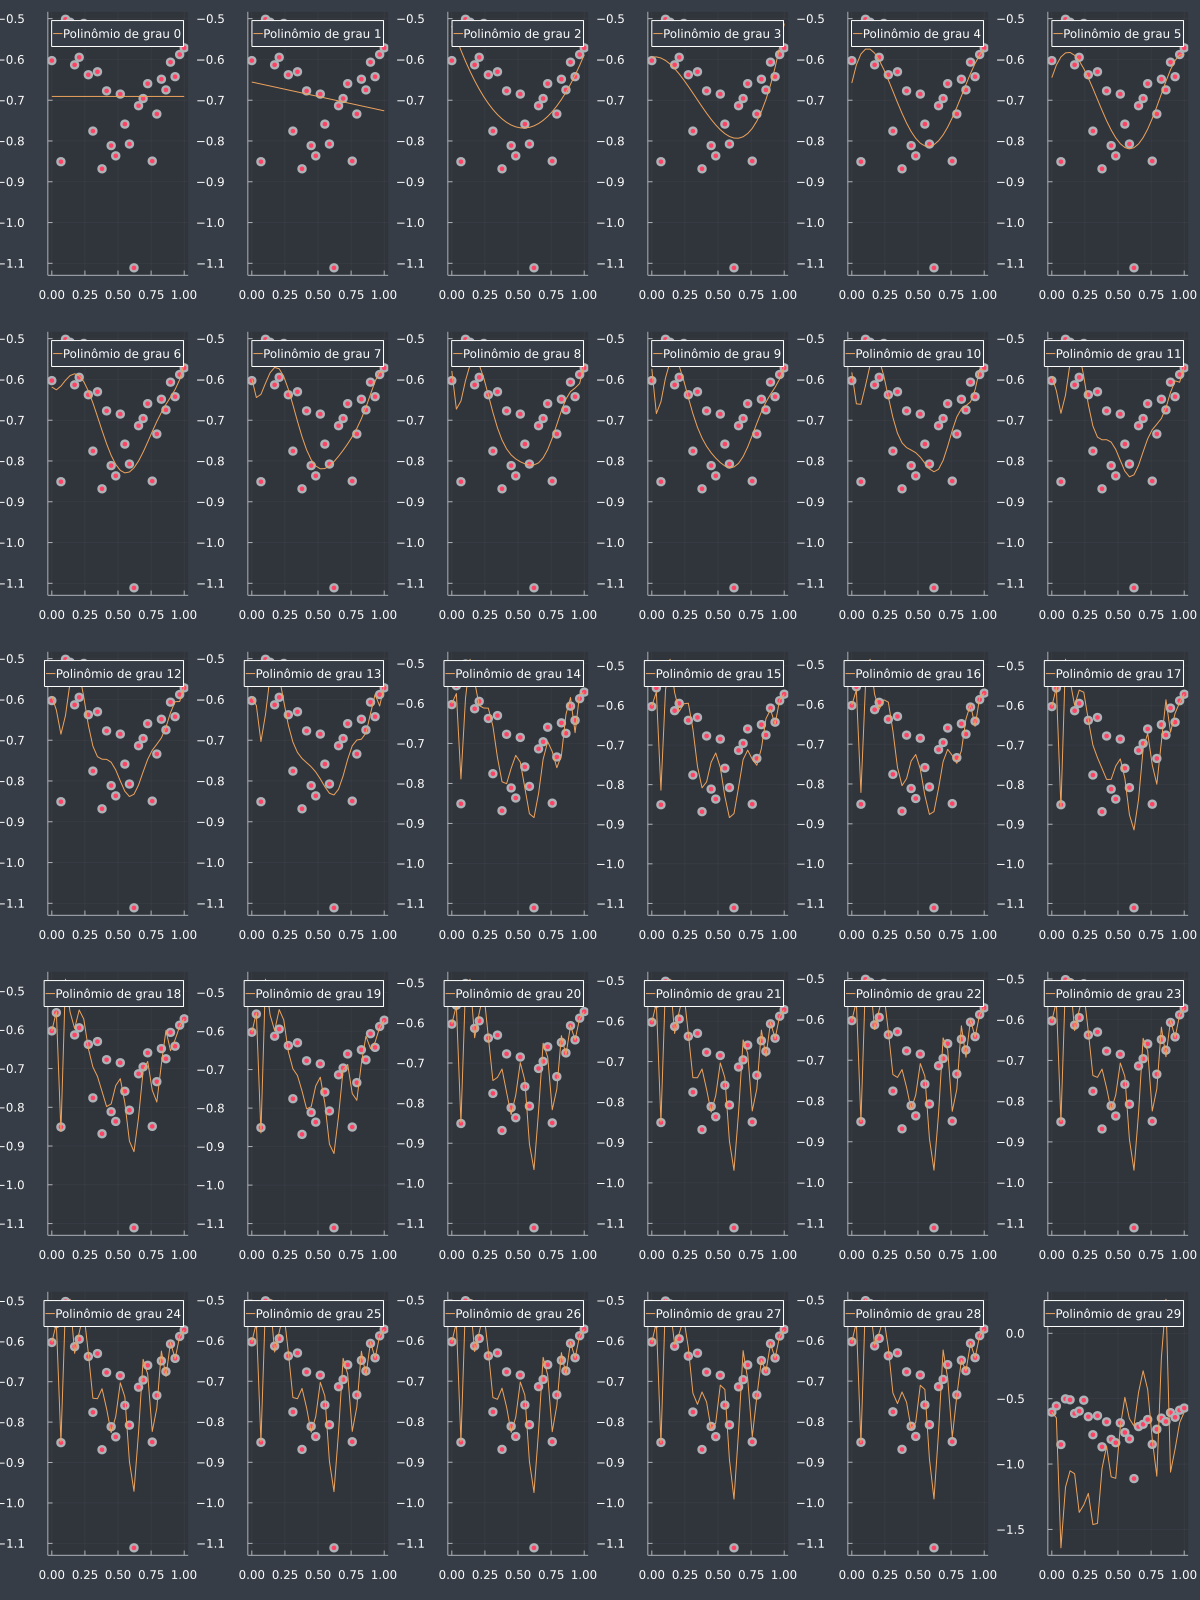

In [19]:
plot(array_plots..., size=(1200,1600))

Tem tantos gráficos que o trabalho até ficou em HD. Brincadeiras à parte, pode parecer meio confuso esse amontoado de gráficos, mas é o suficiente para olharmos a tendência. No início o grau é muito pequeno para conseguir interpolar bem essa enorme quantidade de pontos. Quando chega no grau 5 podemos ver que está tomando forma, como era de se esperar. Mas por volta do polinômio de grau 10 começa a ficar caótico.

### 3. É possível fazer a regressão com um polinômio de grau maior que 29? O que acontece no Julia?

Sim, é possível. Vamos imaginar um exemplo um pouco menor para ser mais fácil visualizar, usando apenas 2 pontos. A forma de interpolar seria usando uma reta que passe por esses 2 pontos, então um polinômio de grau 1. No entanto, seria possível encontrar uma parábola (Um polinômio de grau 2) que também passe por esses pontos, porém a solução não é única, existiriam infinitas parábolas que solucionam nosso problema. Nesse caso é a mesma coisa, seria possível usar um polinômio de grau maior que 29, mas existiriam infinitas soluções, e o método apenas retornaria uma delas.

Para saber o que acontece no Julia só há uma forma de descobrir:

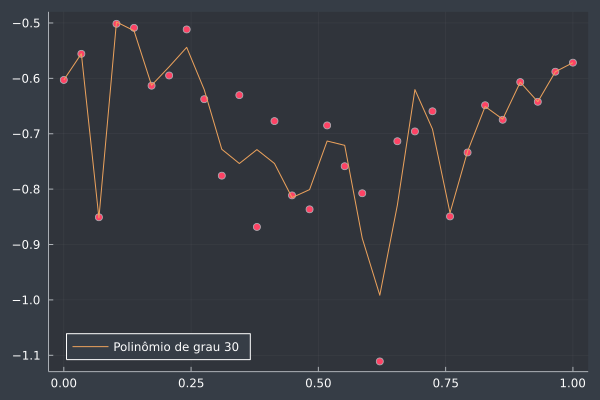

In [20]:
plot(X, Y, label="", seriestype = :scatter, legend = :bottomleft)
plot!(X, Polynomial(interpolation(X, Y, 30)).(X), label = "Polinômio de grau 30")

O gráfico deveria passar por todos os pontos e ser uma das infinitas soluções, mas não foi o que aconteceu. A explicação será feita com auxílio do gráfico de erro usado no próximo item, então deixaremos a explicação mais adiante.

### 4. Faça o plot do Erro total (eixo y) por grau (eixo x). O que se pode dizer desse gráfico conforme o grau aumenta? Era o que você esperava? Por quê?

Vamos calcular o erro de cada polinômio e fazer o gráfico:

In [21]:
X_erro = range(0, 29, step = 1)
Y_erro = [calculate_error(X, Y, polynomials[i]) for i = 1:30];

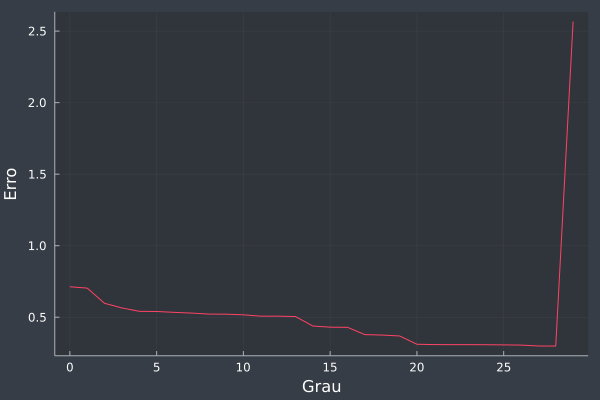

In [22]:
plot(X_erro, Y_erro, leg=false, xlabel="Grau", ylabel="Erro")

À medida que o grau aumenta o erro diminui, como era esperado. No entanto ao chegar perto do grau 28 o erro explode, o que não era esperado. Quando o grau aumenta o erro deve ser sempre no máximo o erro anterior, o que é facilmente provado matematicamente:

_Prova._ Podemos pensar como se maior o grau, maior a liberdade da função fazer uma forma estranha que passe perto de mais pontos. Vamos imaginar um polinômio de grau 1 e grau 2 para facilitar nossa análise. Os polinômio possuem a seguinte forma:

$$c_0 + c_1x$$
$$d_0 + d_1x + d_2x^2$$

Digamos que o primeiro polinômio tenha um erro $E_1$. O segundo terá um erro $E_2$. Porém, essa é uma solução válida para o segundo polinômio:

$$d_0 = c_0$$
$$d_1 = c_1$$
$$d_2 = 0$$

Isso significa que $E_2 = E_1$, pois os polinômios são iguais. Pode ser que exista algum valor de $d_2$ que garanta um erro menor. Como o método irá retornar o menor erro, sabemos que $E_2 \leq E_1$. Todo nosso raciocínio consegue facilmente ser provado por indução usando que $d_{n+1} = 0$ (Fica como exercício ao leitor) e vemos que $E_{n+1} \leq E_n$. $\blacksquare$

Assumindo que a definição de Mínimos Quadrados do Julia está correta, então não há nenhum erro com o método, deve ser algo alheio. Podemos notar o seguinte padrão e seguir essa linha de raciocínio:
* O erro aumenta com graus maiores
* Graus maiores implicam em mais contas 
* Muitas contas realizadas por um computador dão mais chance de erro de precisão

Podemos ver que nem o Julia consegue fugir do clássico

In [23]:
0.1 + 0.2 == 0.3

false

Os dois erros possíveis são:
1. Overflow
2. Precisão de ponto flutuante


#### 4.1 Overflow
Não temos muito como avaliar de forma fácil se ocorre ou não, pois no processo de inversão da matriz pode ocorrer de aparecerem sinais negativos, impedindo de ver se houve troca de sinal em números grandes. Ainda assim sabemos que é uma possibilidade pois os tipos em Julia possuem seus limites:

In [24]:
println(2^63-1)
println(2^63)

9223372036854775807
-9223372036854775808


#### 4.2 Precisão de ponto flutuante
Se esse for o caso podemos amenizar fazendo com que a função não tenha pontos tão pequenos, então vamos aumentar o domínio para ver o que acontece:

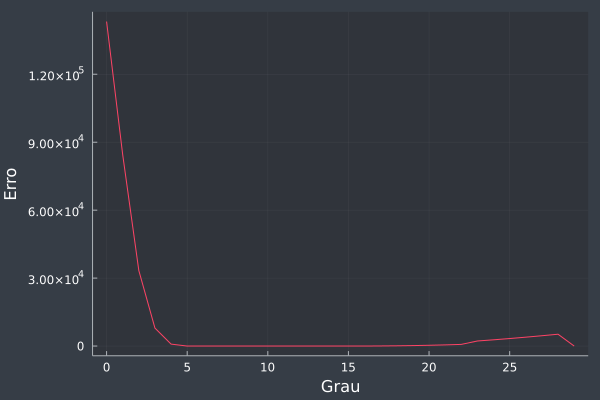

In [25]:
Random.seed!(42)
coeff = randn(6)
P = Polynomial(coeff)

noise = 0.1
n = 30
X = range(0, 10, length=n)
Y = P.(X) + randn(n)*noise

polynomials = [Polynomial(interpolation(X, Y, i)) for i = 0:29]

X_erro = range(0, 29, step = 1)
Y_erro = [calculate_error(X, Y, polynomials[i]) for i = 1:30]

plot(X_erro, Y_erro, leg=false, xlabel="Grau", ylabel="Erro")

O erro continua aumentando, mas podemos perceber que foi bem amenizado, então provavelmente o problema é a aproximação de números decimais realizada pelo computador. Podemos inclusive comparar um dos nossos gráficos com o <a href="https://www.desmos.com/calculator/wrfg4ylxqo" target="_blank">Desmos</a>:

<img src="desmos-graph.png" alt="Gráfico Desmos"/>

Esse gráfico é uma interpolação de grau 26. Em azul temos o polinômio encontrado pelo Desmos enquanto em vermelho temos o polinômio encontrado anteriormente. Assumindo que o Desmos tenha uma precisão melhor de float (O que é esperado dada sua popularidade), podemos ver que os coeficientes são diferentes, mostrando um problema em nossos cálculos.

Essa questão se estendeu bem mais do que o esperado, mas dias de trabalho e noites sem dormir com ela na cabeça dão nessa longa jornada. Mas resumindo a questão em poucas palavras:
1. Polinômio gerado usando código apresentado em aula
0. Regressão feita com as funções implementadas anteriormente
0. É possível fazer regressão com grau maior, mas no Julia há problema de precisão de float
0. Gráfico feito e o erro não foi o esperado, graças ao problema citado

## Exercício 3 (1.3)

A ténica desenvolvida consiste em fazer uma matriz em que cada coluna represente um filme e cada linha represente uma classificação. Depois um vetor com a diferença entre os filmes. Com isso, é possível usar Mínimos Quadrados para resolver o sistema e saber qual o ranking de cada filme. Vamos ordenar os filmes da seguinte forma para facilitar:
1. Toy Story
0. Rocky
0. De volta pro futuro
0. Curtindo a vida adoidado
0. Os incríveis
0. Duna
0. Batman
0. Harry Potter
0. Shrek

Agora vamos criar a matriz de filmes:

In [26]:
# TOY ROC DVF CVA INC DUN BAT HP1 SHR
movies = [    
    1 -1 0 0 0 0 0 0 0;
    0 0 1 -1 0 0 0 0 0;
    0 0 0 0 1 -1 0 0 0;
    0 0 0 0 0 0 1 -1 0;
    0 0 0 0 0 -1 0 0 1;
    0 -1 0 0 0 0 0 1 0;
    1 0 -1 0 0 0 0 0 0;
    0 0 0 0 1 0 0 -1 0;
    0 0 0 1 0 -1 0 0 0;
    0 0 1 0 0 -1 0 0 0;
    0 -1 0 0 0 0 0 0 1;
    0 0 0 0 1 0 -1 0 0;
    1 0 0 0 0 0 -1 0 0;
    0 0 0 -1 1 0 0 0 0
];

Agora o vetor de resultados, sendo o maior valor - o menor valor

In [27]:
ratings = [
    11;
    3;
    7;
    2;
    9;
    7;
    5;
    5;
    2;
    2;
    11;
    5;
    3;
    7
];

Com isso podemos resolver o sistema:

In [28]:
result = movies \ ratings
resultWithIndex = sort([(result[i], i) for i = 1:length(result)])

9-element Vector{Tuple{Float64, Int64}}:
 (-6.898381404405502, 2)
 (-3.450407691371547, 6)
 (-2.519410977242302, 4)
 (-0.6420834854569781, 3)
 (-0.5643178775708898, 8)
 (0.6711695265912128, 7)
 (4.043568212242912, 1)
 (4.5342582451016185, 5)
 (4.825605452111474, 9)

Então nosso ranking de filmes é:
<ol reversed>
  <li>Rocky</li>
  <li>Duna</li>
  <li>Curtindo a Vida Adoiado</li>
  <li>De volta pro Futuro</li>
  <li>Harry Potter</li>
  <li>Batman</li>
  <li>Toy Story</li>
  <li>Os Incríveis</li>
  <li>Shrek</li>
</ol>

O melhor filme é Shrek, no entanto podemos aproveitar e fazer uma análise sobre o gosto da turma.

Os 3 primeiros filmes são os únicos animados e são os únicos da Disney/Pixar, então sabemos que a turma tem uma preferência a filmes do estilo Pixar. Eles também tiveram uma pontuação muito próxima, mostrando a preferência a esse gênero independente do filme.

Com Shrek sendo o primeiro poderíamos pensar que a turma também prefere filmes dos quais renderam memes, mas, se esse fosse o caso, Rocky também teria uma boa classificação. Por ficar em último sabemos que memes provavelmente não são um parâmetro relevante no gosto da turma.

Os 3 filmes do meio também praticamente empataram, e os 3 são do mesmo nicho _geek_. Podemos ver também uma tendência da turma para esse gênero, o que inclusive faz sentido pensando que a turma é do curso de Ciência da Computação, que geralmente gosta desse estilo de filme.

## Exercício 4 (1.4)

### Parte 1: Leitura
Primeiro vamos ler a tabela para acessar os dados:

In [29]:
df = DataFrame(CSV.File("Pesagem.csv", decimal=','))

,Data,Peso (kg)
,String7,Float64
1,26/10,120.6
2,27/10,121.6
3,28/10,120.8
4,29/10,121.4
5,30/10,121.1
6,5/11,121.1
7,6/11,120.4
8,7/11,120.3
9,8/11,120.8


### Parte 2: Limpeza
Agora precisamos fazer uma limpeza

#### 2.1: Data
Começando por limpar a data. Queremos uma lista em que a primeira data seja o marco inicial, o ponto $0$. As datas seguintes serão a quantidade de dias que se passaram desde o marco inicial. Para isso faremos a seguinte sequência de passos:
1. Leitura da data
2. Adição do ano
3. Conversão em milissegundos 
4. Normalização
5. Conversão em dias

##### Passo 1: Leitura da data

In [30]:
datesRaw = df[:, "Data"];

##### Passo 2: Adição do ano

Para adicionar o ano é possível ver que as datas $56$ e $57$ são as datas em que ocorrem uma mudança:

In [31]:
println(datesRaw[56])
println(datesRaw[57])

29/12
4/1


Vamos assumir que as medições começaram em 2021. Nesse caso específico não importa, mas isso poderia ser importante caso o intervalo de medição passasse em fevereiro, para a possibilidade de um ano bissexto. Então até a data $56$ precisaremos adicionar "/2021" no final, enquanto a partir da data $57$ precisamos adicionar "/2022".

In [32]:
datesWithYear = [datesRaw[1:56].*"/2021"..., datesRaw[57:end].*"/2022"...];

In [33]:
println(datesWithYear[56])
println(datesWithYear[57])

29/12/2021
4/1/2022


##### Passo 3: Conversão em milissegundos

In [34]:
timestamps = Dates.value.(DateTime.(datesWithYear, "dd/mm/yyyy"));

##### Passo 4: Normalização

Como vamos definir o primeiro momento com o valor $0$, basta subtrairmos todos os valores do primeiro

In [35]:
timestampsNormalized = timestamps .- timestamps[1];

##### Passo 5: Conversão em dias

Para converter de milissegundos para dias basta seguir a sequência de divisões:

Milissegundos $\xrightarrow{/1000}$ Segundos $\xrightarrow{/60}$ Minutos $\xrightarrow{/60}$ Horas $\xrightarrow{/24}$ Dias

In [36]:
daysSinceStart = timestampsNormalized ./1000 ./60 ./60 ./24;

#### 2.2: Peso
Para o bem de todos e felicidade geral da nação, o peso não precisa passar por nenhum tratamento. Na planilha os números vieram separados por vírgula, mas com a flag que o separador decimal era esse caracter, todos os pesos já foram convertidos para Float64, e não queremos mudar seu valor

In [37]:
weights = df[:, "Peso (kg)"];

### Parte 3: Regressão
Primeiro vamos visualizar os pontos, para sabermos com o que estamos lidando:

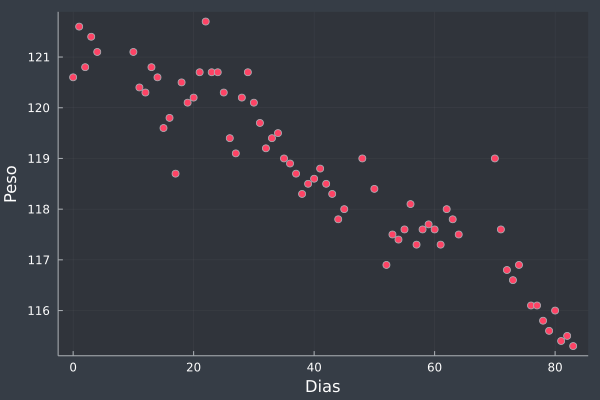

In [38]:
scatter(daysSinceStart, weights, label="", xlabel="Dias", ylabel="Peso")

Vamos analisar nossas opções:
1. Polinomial
2. Senoidal
3. Exponencial

#### Polinomial
Podemos dizer que isso parece uma reta, então um polinômio de grau $1$ talvez seja uma boa opção. Um polinômio maior talvez não seja uma boa ideia pois poderia implicar em variações maiores do peso. Podemos ver que os pontos às vezes dão uma variada grande de um dia para o outro, mas isso poderia atrapalhar na previsão de dados futuros, uma reta é mais confiável a longo prazo nesse caso, pois sabemos que a tendência é de queda e que a variação é baixa.

#### Senoidal
Até daria para pensar que o peso de uma pessoa é senoidal, aumentando nas férias e diminuindo do dia a dia, mas não é o caso do peso de uma pessoa que está emagrecendo. E, de acordo com os dados, podemos assumir que é o caso da pessoa, então regressão senoidal não é uma boa alternativa.

#### Exponencial
Um gráfico exponencial implica em um plateau, mas se o objetivo da pessoa é continuar emagrecendo mais que isso, esse plateau poderia atrapalhar na previsão, então também não será uma boa alternativa (Talvez com mais dados e uma meta final de emagrecimento seria uma opção melhor).

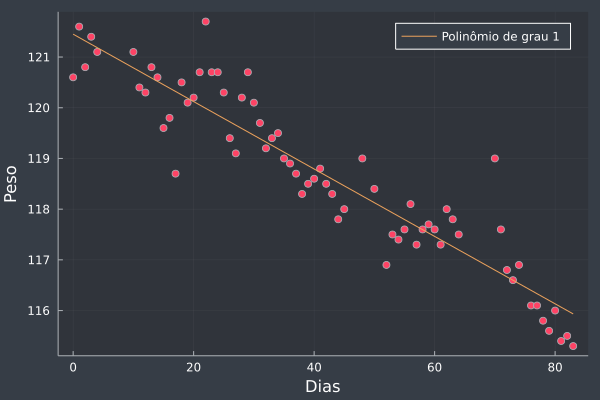

In [39]:
weightCoeff = interpolation(daysSinceStart, weights, 1)
weightFunc = Polynomial(weightCoeff)
plot!(daysSinceStart, weightFunc.(daysSinceStart), label = "Polinômio de grau 1")

### Parte 4: Solução
Agora que temos uma função que aproxime o peso, precisamos encontrar quando o peso será 110kg, ou, quando $P(d) = 110$. Como fizemos regressão de grau 1, nossa função segue o formato $P(d) = c_1 + c_2d$. Assim, podemos fazer a seguinte manipulação:
$$110 = c_1 + c_2d$$
$$d = \frac{110 - c_1}{c_2}$$

In [40]:
resultDay = (110 - weightCoeff[1]) / weightCoeff[2]

172.26753579630665

Podemos ver que $172.26$ é a solução, o que significa que depois de $172.26$ dias, o peso da pessoa será 110kg. No entanto, como estamos mexendo com dias inteiros, vamos arredondar para cima, o que significa que a pessoa estará pesando 110kg depois de $173$ dias. Basta agora descobrir quando é isso: 

In [41]:
firstDay = DateTime(datesWithYear[1], "dd/mm/yyyy")
finalDay = firstDay + Dates.Day(ceil(resultDay))

2022-04-17T00:00:00

Então a pessoa estará pensando 110kg no dia 17 de Abril de 2022.

## Exercício 5 (1.5)

A Lei de Resfriamento de Newton é:
$$T(t) = (T_0-T_f)e^{-kt} +T_f$$

A princípio deveríamos considerar a temperatura inicial como $37°C$, mas isso envolve saber o quão distante está a temperatura inicial das medições. Se soubéssemos então a questão já estaria feita. Nesse caso vamos considerar como inicial a primeira medição, assim podemos colocar as outras. Adicionando os pontos medidos, nosso gráfico ficará da seguinte forma:

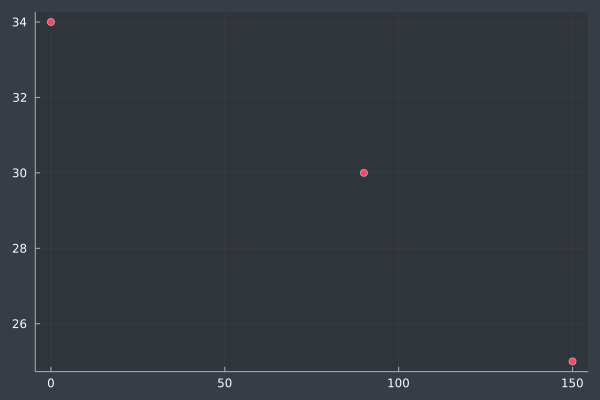

In [42]:
X = [0, 90, 150]
Y = [34, 30, 25]
scatter(X, Y, leg=false)

Agora precisamos fazer a interpolação da função $(34-20)e^{-kx}+20$. Antes vamos renomear o valor que queremos encontrar para $c$ e remover seu sinal. Por quê? Porque podemos. O sinal não importa pois a constante pode assumir qualquer valor, negativo ou positivo, e o nome é apenas para ficar similar a exercícios anteriores.

Agora, podemos fazer as seguintes manipulações:
$$y = 14e^{cx}+20$$
$$y-20 = 14e^{cx}$$
$$\frac{y-20}{14} = e^{cx}$$
$$ln(\frac{y-20}{14}) = ln(e^{cx})$$
$$ln(\frac{y-20}{14}) = cxln(e) = cx$$

Assim, como nosso "dicionário" de conversão, teremos os seguintes valores:
* $y\_exp = ln(\frac{y-20}{14}) \rightarrow y = 14e^{y\_exp} + 20$
* $x\_exp = x$
* $c\_exp = c$

Vamos agora interpolar usando a função $y\_exp = cx\_exp$. O problema é que interpolando da maneira feita anteriormente, isso nos dará um coeficiente para $x\_exp$ e um coeficiente constante, no entanto queremos que esse segundo seja $0$. Para isso teremos que mudar a forma como a interpolação ocorre mudando a matriz de Vandermonde.

A matriz de Vandermonde nesse caso possui 2 colunas, a primeira sendo $1$, para que o coeficiente constante seja constante, e a segunda sendo o valor de cada $x$, para multiplicar pelo coeficiente de $x^1$. Vamos mudar a matriz para que a primeira coluna seja sempre $0$, dessa forma o coeficiente sempre irá zerar.

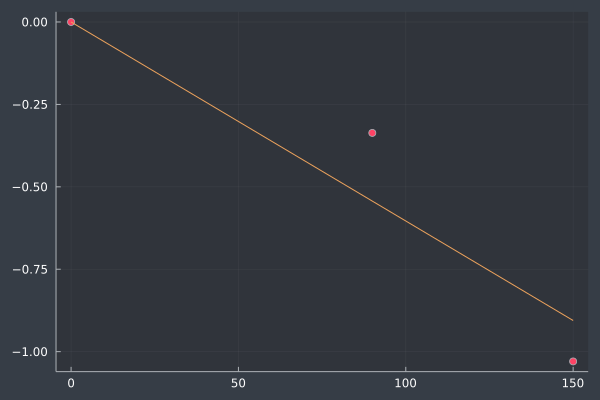

In [43]:
X_exp = X
Y_exp = log.((Y .- 20) ./ 14)

V_exp = vandermonde(X_exp, length(Y_exp), 1)
V_exp[:, 1] .= 0

coeff_exp = V_exp \ Y_exp

scatter(X_exp, Y_exp, leg=false)
plot!(X_exp, Polynomial(coeff_exp).(X_exp))

In [44]:
coeff_exp

2-element Vector{Float64}:
  0.0
 -0.0060367782311465

Agora que encontramos o polinômio que aproxime esses pontos, podemos voltar ao exponencial a partir do valor encontrando:

In [45]:
c = coeff_exp[2];

A função temperatura é:
$$T(t) = 14e^{ct} + 20$$
Queremos saber quando a temperatura deu $37$, para isso podemos fazer as seguintes manipulações:
$$37 = 14e^{ct} + 20$$
$$e^{ct} = \frac{17}{14}$$
$$t = \frac{1}{c}ln\left(\frac{17}{14}\right)$$
Agora podemos encontrar o horário que estava 37 graus

In [46]:
log(17/14)/c

-32.1621909910849

Sabemos então que a morte aconteceu aproximadamente 32 minutos antes da chegada da polícia, logo, a hora do crime foi aproximadamente 14:28.